<a href="https://colab.research.google.com/github/saraalbagory/ml-project/blob/main/alphabet_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sachinpatel21/az-handwritten-alphabets-in-csv-format")

print("Path to dataset files:", path)

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Menna\.cache\kagglehub\datasets\sachinpatel21\az-handwritten-alphabets-in-csv-format\versions\5


In [2]:
import pandas as pd

data = pd.read_csv(path + "/A_Z Handwritten Data.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


The ord function returns the Unicode (ASCII) code point of a character.


In [3]:
import numpy as np

#get the last column
numericLabels =data.iloc[:,0].unique()

# for i in numericLabels:
#   print(f"Label: {chr(i + ord('A'))}")
# print(numericLabels)
# convert the number to labels
uniqueLabels = np.array([chr(i + ord('A')) for i in numericLabels])
print(uniqueLabels)
len=numericLabels.size
print(f"the number of classes: {len}")

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
the number of classes: 26


show their distribution

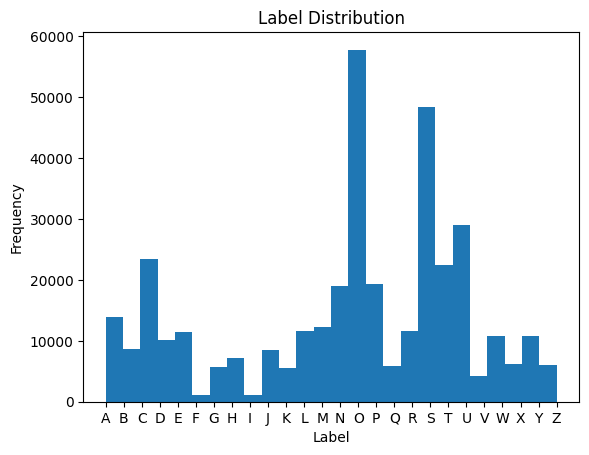

In [4]:
import matplotlib.pyplot as plt

numericLabels =data.iloc[:,0]
labels = np.array([chr(i + ord('A')) for i in numericLabels])
plt.hist(labels, bins=len)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


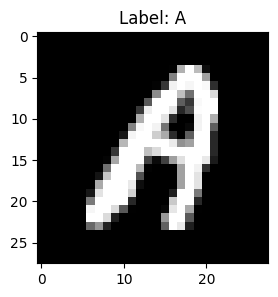

In [5]:
import matplotlib.pyplot as plt

data.info()
first_row = data.iloc[0]
label = first_row.iloc[0]
image_data = first_row.iloc[1:].values

# Reshape the pixel data to 28x28 matrix format
image = image_data.reshape((28, 28))

# Display the image
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {chr(label + ord('A'))}")  # Convert label number to letter
plt.show()

In [6]:
image_data=data.iloc[:,1:]
normalized_image_data=image_data/255
print(normalized_image_data)
normalized_image_data.describe()

        0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
372445  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372448  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.6

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,3.724500e+05,3.724500e+05
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000006,0.000006,0.000004,0.000004,0.000003,0.000002,0.000002,0.000003,9.370912e-07,4.211646e-08
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001925,0.002029,0.001652,0.001644,0.001512,0.001254,0.000819,0.001315,5.288302e-04,2.570312e-05
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988235,0.886275,0.898039,0.894118,0.921569,0.760784,0.403922,0.776471,3.215686e-01,1.568627e-02


In [7]:
# import tensorflow as tf
# normalized_features2=tf.keras.utils.normalize(features,axis=1)

Reshape the Flattened Vectors to Reconstruct and Display the Images

In [8]:
# reshaped_images = []
# for _, row in normalized_image_data.iterrows():  # Loop through each row
#     reshaped_image = row.values.reshape(28, 28)
#     reshaped_images.append(reshaped_image)
# reshaped_images = np.array(reshaped_images)
reshaped_images = normalized_image_data.values.reshape(-1, 28, 28)
# for i in range(10):
#   plt.figure(figsize=(1,1))
#   plt.imshow(reshaped_images[i], cmap='gray')
#   plt.title(f"label : {labels[i]}")
#   plt.show()

In [9]:
from sklearn.model_selection import train_test_split

numericLabels=data.iloc[:,0]
image_train, image_test, label_train, label_test=train_test_split(reshaped_images,numericLabels,test_size=0.2,random_state=42)
image_train_2d = image_train.reshape(image_train.shape[0], -1)
image_test_2d = image_test.reshape(image_test.shape[0], -1)

Split the training dataset into training and validation datasets.

In [10]:
image_train, image_val, label_train, label_val = train_test_split(image_train, label_train, test_size=0.2, random_state=42)

In [16]:
image_train_2d_lr = image_train.reshape(image_train.shape[0], -1)
# image_val_2d_lr = image_val.reshape(-1, 28, 28, 1)
image_test_2d_lr = image_test.reshape(-1, 28, 28, 1)

In [17]:
print("Shape of image_train_2d:", image_train_2d_lr.shape)  # Should be (num_samples, 784)
print("Shape of label_train:", label_train.shape)  # Should be (num_samples,)

Shape of image_train_2d: (238368, 784)
Shape of label_train: (238368,)


In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

# Define the Logistic Regression model for One-vs-All classification
class LogisticRegressionOneVsAll:
    def __init__(self, num_classes, num_features, learning_rate=0.1, num_epochs=1000, batch_size=256):
        # Initialize model parameters
        self.num_classes = num_classes
        self.num_features = num_features
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weights = np.zeros((num_classes, num_features))  # Initialize weights
        self.biases = np.zeros(num_classes)  # Initialize biases

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        # Train the model using gradient ascent with mini-batches
        m = X.shape[0]  # Number of samples
        self.error_curve = []  # Track error over epochs
        self.accuracy_curve = []  # Track accuracy over epochs

        for epoch in range(self.num_epochs):
            total_loss = 0  # Total loss for this epoch
            correct_predictions = 0  # Correct predictions for this epoch

            # Shuffle the data at the start of each epoch
            indices = np.arange(m)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            for start in range(0, m, self.batch_size):
                # Create mini-batches
                end = start + self.batch_size
                X_batch = X[start:end]
                y_batch = y[start:end]

                for c in range(self.num_classes):
                    # Convert labels to binary (1 for class c, 0 for others)
                    binary_y = (y_batch == c).astype(int)

                    # Compute predictions using the sigmoid function
                    z = np.dot(X_batch, self.weights[c]) + self.biases[c]
                    predictions = self.sigmoid(z)

                    # Compute the loss for class c
                    total_loss += -np.sum(binary_y * np.log(predictions + 1e-15) + (1 - binary_y) * np.log(1 - predictions + 1e-15))

                    # Compute gradients for weights and biases
                    gradient_w = np.dot((binary_y - predictions), X_batch) / X_batch.shape[0]
                    gradient_b = np.sum(binary_y - predictions) / X_batch.shape[0]

                    # Update weights and biases using gradient ascent
                    self.weights[c] += self.learning_rate * gradient_w
                    self.biases[c] += self.learning_rate * gradient_b

                    # Count correct predictions for class c
                    correct_predictions += np.sum((predictions >= 0.5) == binary_y)

            # Record average loss and accuracy for this epoch
            self.error_curve.append(total_loss / m)
            self.accuracy_curve.append(correct_predictions / (m * self.num_classes))

            # Print progress every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{self.num_epochs}, Loss: {total_loss / m:.4f}, Accuracy: {correct_predictions / (m * self.num_classes):.4f}")

    def predict(self, X):
        # Predict the class with the highest score
        logits = np.dot(X, self.weights.T) + self.biases
        return np.argmax(logits, axis=1)

# PART 1: Data Preparation
# Number of classes and features
num_classes = 26
num_features = image_train_2d_lr.shape[1]

# Instantiate the model
model = LogisticRegressionOneVsAll(num_classes=num_classes, num_features=num_features, learning_rate=0.1, num_epochs=100, batch_size=256)

# PART 2: Model Training
model.train(image_train_2d_lr, label_train.values)

Epoch 10/100, Loss: 1.1463, Accuracy: 0.9863
Epoch 20/100, Loss: 1.1068, Accuracy: 0.9867
Epoch 30/100, Loss: 1.0934, Accuracy: 0.9868
Epoch 40/100, Loss: 1.0864, Accuracy: 0.9869
Epoch 50/100, Loss: 1.0819, Accuracy: 0.9869
Epoch 60/100, Loss: 1.0788, Accuracy: 0.9870
Epoch 70/100, Loss: 1.0764, Accuracy: 0.9870
Epoch 80/100, Loss: 1.0745, Accuracy: 0.9870
Epoch 90/100, Loss: 1.0730, Accuracy: 0.9870
Epoch 100/100, Loss: 1.0717, Accuracy: 0.9871


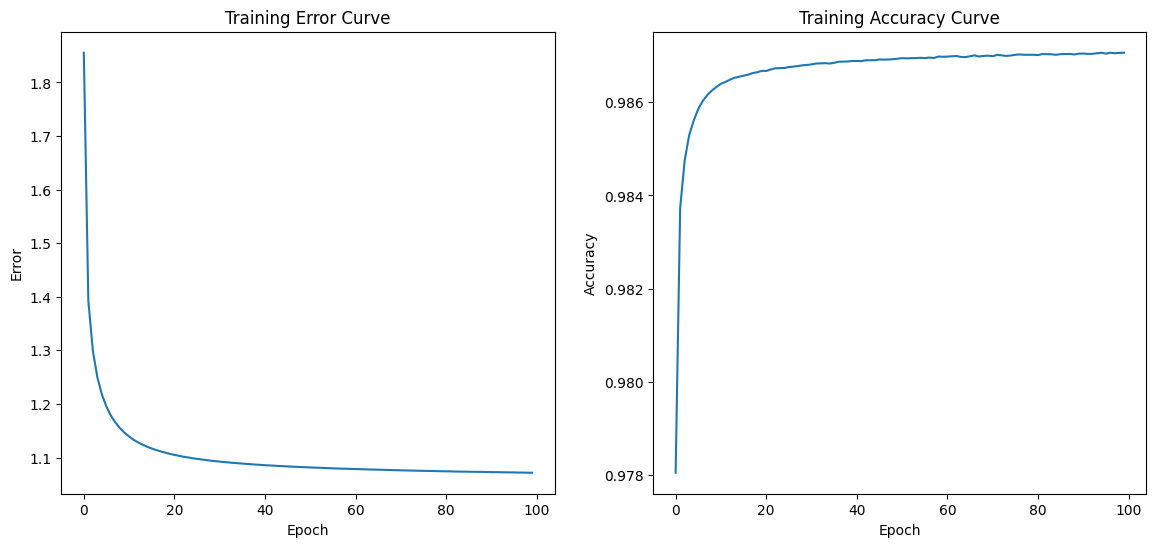

In [19]:
# PART 3: Visualize Training Performance
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot error curve
plt.subplot(1, 2, 1)
plt.plot(model.error_curve)
plt.title('Training Error Curve')
plt.xlabel('Epoch')
plt.ylabel('Error')

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(model.accuracy_curve)
plt.title('Training Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [20]:
# PART 4: Model Evaluation
predictions = model.predict(image_test_2d)  # Get predictions for test data

# Confusion Matrix
cm = confusion_matrix(label_test, predictions)
print("Confusion Matrix:")
print(cm)


# Average F1 Score
average_f1 = f1_score(label_test, predictions, average='weighted')
print(f"Average F1 Score: {average_f1:.4f}")

Confusion Matrix:
[[ 2328     5     7     6    48     0     4    35     0     4     9     3
     62    71    35    46     7    29     7     1    25     1     4    38
     31     0]
 [   25  1182    15    26    51     0     4    26     0     2     6     0
     27     5    57    10     2    29   156     2    23     0     3     5
      3    14]
 [    1    10  4288     1    41     1    25     1     2     6    13    39
      1    37   120    32     3    27    17    10    53     0     1     1
      4     8]
 [    6    21     0  1503     2     0     0     4     0    10     3     2
     10     7   343    26     8     1    44     4    35     1     0     3
      6     5]
 [   17    30   141     0  1764     3    36     8     0     4    23    26
      0    14     4     9     4    50    47     2    12     0     5     1
      2    12]
 [    3     0     1     0    15   175     3     1     0     0     0     0
      0     1     0    14     0     0     0    15     0     1     1     1
      0     0]
 [  